In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
pd.__version__
import seaborn as sns

In [53]:
df_labels = pd.read_csv('labels.txt',sep='\n', delimiter=',', header=None )

# Function to remove dublicates from labels.

In [54]:
def uniquify(df_columns):
    df_columns = df_columns.T.iloc[0,:]
    seen = list()

    for item in df_columns:
        fudge = 'hand'
        newitem = item
        
        if newitem in seen:
            newitem = "{}_{}".format(item, fudge)

        seen.append(newitem)
    return seen
        
label_list = uniquify(df_labels)

In [55]:
df = pd.read_csv('data.txt', header=None, names=label_list, na_values = 'N/A')#, set_flags(allows_duplicate_labels=False))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [57]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,.0f
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,.0f
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,.0f
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,.0f
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,.0f


# Changing the label col from object to numbers.

In [58]:
df.iloc[:,-1].unique()
# array(['\x01.0f', '\x03.0f', '\x02.0f', '\x04.0f'], dtype=object)

for index, rows in df.iterrows():
    if df.loc[index, 'Activity'] == '\x01.0f':
        df.loc[index, 'Activity'] = 1
    elif df.loc[index, 'Activity'] == '\x02.0f':
        df.loc[index, 'Activity'] = 2
    elif df.loc[index, 'Activity'] == '\x03.0f':
        df.loc[index, 'Activity'] = 3
    elif df.loc[index, 'Activity'] == '\x04.0f':
        df.loc[index, 'Activity'] = 4

# Checking for NA

In [59]:
for col in range(df.shape[1]):
    # YOUR CODE HERE
    n_miss = df.isnull().sum(axis=0)
    if n_miss.iloc[col] != 0:
        print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))
# No NA in dataset.

* Do we have to normalize all data?

# Summary statistics: 

* The first column correspond to the index of the subject. (1 - 40)
* The next 174 attributes are statistics extracted from the ECG signal. 
* The next 151 attributes are features extracted from the TEB signal. 
* The next 104 attributes come from the EDA measured in the arm.
* The next 104 ones from the EDA in the hand. 
* The last attribute is the pattern class, that is, the corresponding activity: 1-neutral, 2-emotional, 3-mental and 4-physical.

Ide:
 * Group by subject
 * Group by Activity 
 * Filter( string detect (median | mean | std) opmærksom på at "fil" findes med de samme.

In [60]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,1
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,1
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,1
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,1
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,1


# Visualization:

In [61]:
df_labels#.pivot(columns = 0)

,0
0,Subject index (1-40)
1,ECG_original_mean
2,ECG_original_std
3,ECG_original_trimmean25
4,ECG_original_median
...,...
530,EDA_Functionals_power_Filt2geomean(abs)
531,EDA_Functionals_power_Filt2harmmean
532,EDA_Functionals_power_Filt2mad
533,EDA_Functionals_power_Filt2baseline


<AxesSubplot:>

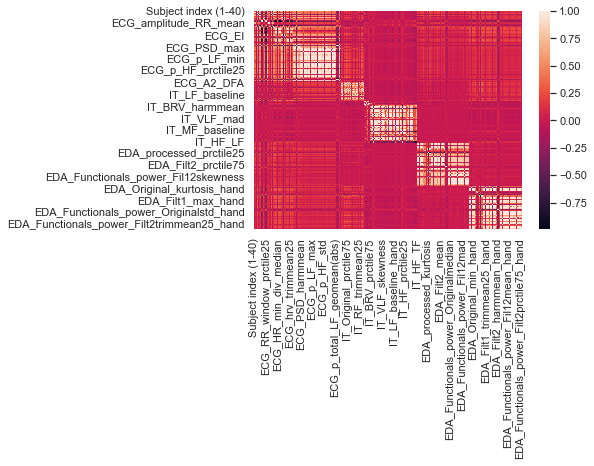

In [48]:
df_heat = df.drop(df.select_dtypes(include = ['object']),axis = 1)
df_heat_corr = df_heat.corr()
sns.set_theme()
sns.heatmap(df_heat_corr)


In [62]:
from sklearn.model_selection import train_test_split
data = df.values
idx = [col for col in range(data.shape[1]) if col != 534]
y = df.iloc[:,534]
X = df.iloc[:,idx]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
y_test

157     2
4104    2
1018    1
1117    4
731     3
       ..
605     2
2181    2
2370    1
3845    3
4204    3
Name: Activity, Length: 896, dtype: object

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg

RandomForestRegressor(random_state=42)

In [64]:
import numpy as np
from sklearn.model_selection import cross_val_score

estimator_range = range(10, 310, 10)

rmse_scores = []

for estimator in estimator_range:
    rf_reg = RandomForestRegressor(n_estimators=estimator, random_state=42)
    mse_scores = cross_val_score(rf_reg, 
                                 X_train, 
                                 y_train, 
                                 scoring='neg_mean_squared_error',
                                 n_jobs=1, 
                                 cv=5)
    
    rmse_scores.append(np.mean(np.sqrt(-mse_scores)))
    print('Testing',estimator, '/300 estimators')

Testing 10 /300 estimators
Testing 20 /300 estimators
Testing 30 /300 estimators
Testing 40 /300 estimators
Testing 50 /300 estimators
Testing 60 /300 estimators
Testing 70 /300 estimators
Testing 80 /300 estimators
Testing 90 /300 estimators
Testing 100 /300 estimators
Testing 110 /300 estimators
Testing 120 /300 estimators
Testing 130 /300 estimators
Testing 140 /300 estimators
Testing 150 /300 estimators
Testing 160 /300 estimators
Testing 170 /300 estimators
Testing 180 /300 estimators
Testing 190 /300 estimators
Testing 200 /300 estimators
Testing 210 /300 estimators
Testing 220 /300 estimators
Testing 230 /300 estimators
Testing 240 /300 estimators
Testing 250 /300 estimators
Testing 260 /300 estimators
Testing 270 /300 estimators
Testing 280 /300 estimators
Testing 290 /300 estimators
Testing 300 /300 estimators


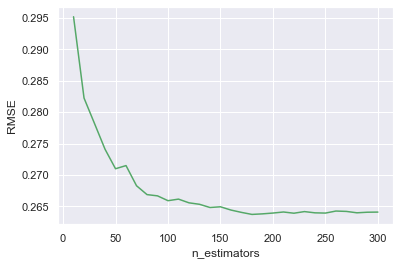

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
n_estimators = range(10, 310, 10)
plt.plot(n_estimators, rmse_scores, 'g')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.show()

In [66]:
x = sorted(zip(rmse_scores, n_estimators))
err, num_est = x[0]
print('Minimum error is {} and its corresponding number of estimators is {}.'.format(err, num_est))

Minimum error is 0.2636974258991698 and its corresponding number of estimators is 180.


In [67]:
feature_range = range(1, df.shape[1])
rmse_scores_feat = []

for feature in feature_range:
    rf_reg = RandomForestRegressor(n_estimators=num_est, max_features=feature, random_state=42)
    mse_scores_feat = cross_val_score(rf_reg, 
                                 X_train, 
                                 y_train, 
                                 scoring='neg_mean_squared_error',
                                 n_jobs=1, 
                                 cv=5)
    rmse_scores_feat.append(np.mean(np.sqrt(-mse_scores_feat)))
    print(feature, '/533 features tested')

1 /533 features tested
2 /533 features tested
3 /533 features tested
4 /533 features tested
5 /533 features tested
6 /533 features tested
7 /533 features tested
8 /533 features tested
9 /533 features tested
10 /533 features tested
11 /533 features tested
12 /533 features tested
13 /533 features tested
14 /533 features tested
15 /533 features tested
16 /533 features tested
17 /533 features tested
18 /533 features tested
19 /533 features tested
20 /533 features tested
21 /533 features tested
22 /533 features tested
23 /533 features tested
24 /533 features tested
25 /533 features tested
26 /533 features tested
27 /533 features tested
28 /533 features tested
29 /533 features tested
30 /533 features tested
31 /533 features tested
32 /533 features tested
33 /533 features tested
34 /533 features tested
35 /533 features tested
36 /533 features tested
37 /533 features tested
38 /533 features tested
39 /533 features tested
40 /533 features tested
41 /533 features tested
42 /533 features tested
4

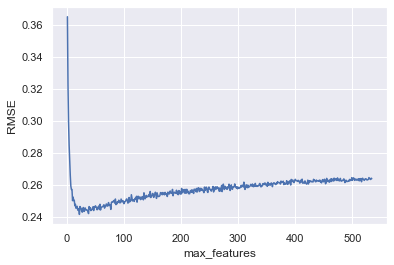

In [68]:
import matplotlib.pyplot as plt
plt.plot(feature_range, rmse_scores_feat, 'b')
plt.xlabel('max_features')
plt.ylabel('RMSE')
plt.show()

In [69]:
x = sorted(zip(rmse_scores_feat, feature_range))
err_feat, max_feat = x[0]
print('Minimum error is {} and its corresponding maximum number of features is {}.'.format(err_feat, max_feat))

Minimum error is 0.24132601182852564 and its corresponding maximum number of features is 22.


In [70]:
rf_reg = RandomForestRegressor(n_estimators=num_est, max_features=max_feat, random_state=42)
rf_reg.fit(X_train, y_train)
train_score = rf_reg.score(X_train, y_train)
test_score = rf_reg.score(X_test, y_test)
print('Train score: ',train_score, ' Test score: ',test_score)

Train score:  0.9948811663433612  Test score:  0.9627270763793825


In [83]:
feat_imp = rf_reg.feature_importances_
feature_imp = feat_imp.sort()
print (feature_imp)

None


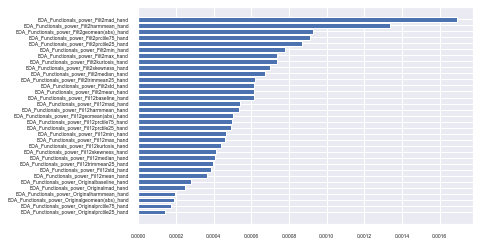

In [86]:
plt.barh(range(33), np.sort(rf_reg.feature_importances_[500:533]))
plt.yticks(range(33), df.columns.tolist()[500:533])
plt.tick_params(axis='x', labelsize=5)
plt.tick_params(axis='y', labelsize=5)